# PulseSort Project Task 2

## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data, normalising and segmenting it

In [7]:
def process_emg_data(file_path):
    df = pd.read_csv(file_path)
    for channel in ['ch1', 'ch2']:
        min_val = df[channel].min()
        max_val = df[channel].max()
        df[channel] = (df[channel] - min_val) / (max_val - min_val)
        windows = []
    window_size = 100
    step_size = 10
    
    # Calculate number of windows
    num_windows = (len(df) - window_size) // step_size + 1
    
    for i in range(num_windows):
        start_idx = i * step_size
        end_idx = start_idx + window_size
        
        # Extract window data
        window_ch1 = df['ch1'].iloc[start_idx:end_idx].values
        window_ch2 = df['ch2'].iloc[start_idx:end_idx].values
        
        # Combine into a single window (each window will have 200 values - 100 ch1 + 100 ch2)
        window = np.concatenate([window_ch1, window_ch2])
        windows.append(window)
    
    return windows

## Processing both files by calling the function defined above

In [8]:
index_finger_windows = process_emg_data('index_finger_data.csv')
okay_windows = process_emg_data('okay_data.csv')

# Print some information about the processed data
print(f"Index finger gesture: {len(index_finger_windows)} windows")
print(f"Okay gesture: {len(okay_windows)} windows")
print(f"Each window contains {len(index_finger_windows[0])} values (100 ch1 + 100 ch2)")

Index finger gesture: 291 windows
Okay gesture: 291 windows
Each window contains 200 values (100 ch1 + 100 ch2)


## Error analysis : Calculating errors using MSE, RMSE and MAV

In [9]:
def calculate_features(window):
    ch1 = window[:100]
    ch2 = window[100:]
    
    features = {
        'rms_ch1': np.sqrt(np.mean(np.square(ch1))),
        'rms_ch2': np.sqrt(np.mean(np.square(ch2))),
        'mav_ch1': np.mean(np.abs(ch1)),
        'mav_ch2': np.mean(np.abs(ch2)),
        'mse_ch1': np.mean(np.square(ch1)),
        'mse_ch2': np.mean(np.square(ch2))
    }
    
    return features

## Full processing pipeline for EMG data

In [10]:
def process_emg_data(file_path, label):
    # Load and normalize data
    df = pd.read_csv(file_path)
    for channel in ['ch1', 'ch2']:
        min_val = df[channel].min()
        max_val = df[channel].max()
        df[channel] = (df[channel] - min_val) / (max_val - min_val)
    
    # Segment data
    windows = []
    window_size = 100
    step_size = 10
    num_windows = (len(df) - window_size) // step_size + 1
    
    for i in range(num_windows):
        start_idx = i * step_size
        end_idx = start_idx + window_size
        window_ch1 = df['ch1'].iloc[start_idx:end_idx].values
        window_ch2 = df['ch2'].iloc[start_idx:end_idx].values
        windows.append(np.concatenate([window_ch1, window_ch2]))
        features_list = []
    for window in windows:
        features = calculate_features(window)
        features['label'] = label
        features_list.append(features)
    
    return pd.DataFrame(features_list)

## Plotting RMSE, MSE and MAV features

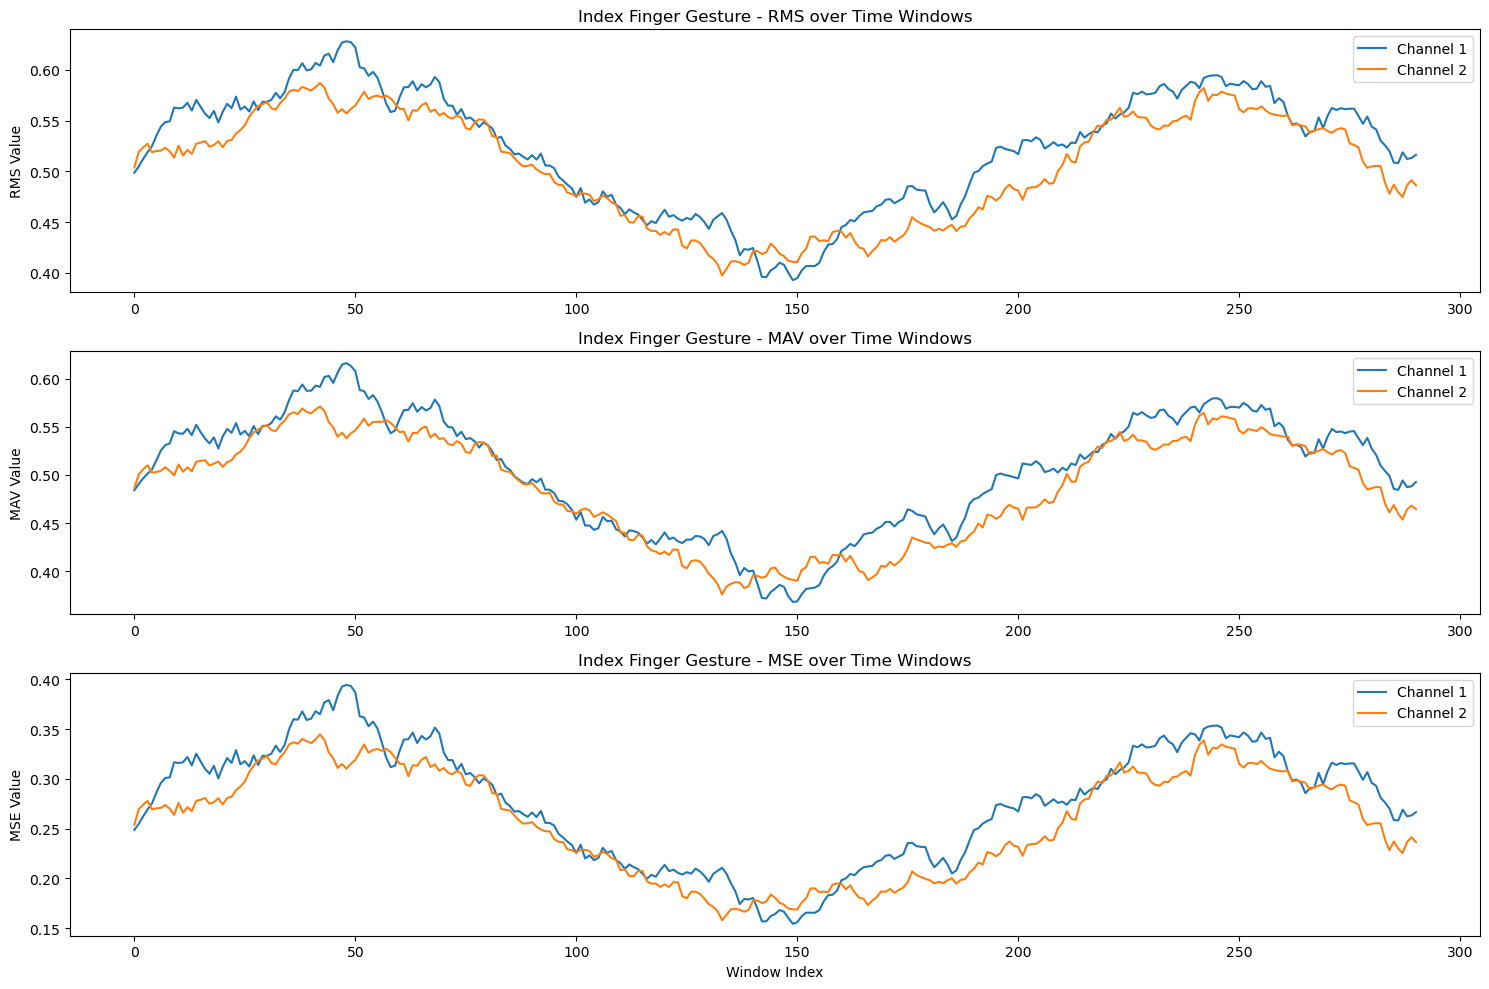


Extracted Features:
    rms_ch1   rms_ch2   mav_ch1   mav_ch2   mse_ch1   mse_ch2  label
0  0.498656  0.503828  0.484162  0.486466  0.248658  0.253843  index
1  0.504775  0.519183  0.490810  0.500707  0.254798  0.269551  index
2  0.512197  0.523549  0.496564  0.505864  0.262346  0.274103  index
3  0.518942  0.527098  0.501425  0.510079  0.269300  0.277833  index
4  0.524789  0.518799  0.505726  0.502513  0.275403  0.269152  index


In [11]:
def plot_features(df, gesture_name):
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    
    plt.plot(df['rms_ch1'], label='Channel 1')
    plt.plot(df['rms_ch2'], label='Channel 2')
    plt.title(f'{gesture_name} Gesture - RMS over Time Windows')
    plt.ylabel('RMS Value')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(df['mav_ch1'], label='Channel 1')
    plt.plot(df['mav_ch2'], label='Channel 2')
    plt.title(f'{gesture_name} Gesture - MAV over Time Windows')
    plt.ylabel('MAV Value')
    plt.legend()
    
    plt.subplot(3, 1, 3)
    plt.plot(df['mse_ch1'], label='Channel 1')
    plt.plot(df['mse_ch2'], label='Channel 2')
    plt.title(f'{gesture_name} Gesture - MSE over Time Windows')
    plt.ylabel('MSE Value')
    plt.xlabel('Window Index')
    plt.legend()
    plt.tight_layout()
    plt.show()

index_df = process_emg_data('index_finger_data.csv', 'index')
okay_df = process_emg_data('okay_data.csv', 'okay')

all_data = pd.concat([index_df, okay_df], ignore_index=True)

all_data.to_csv('emg_features.csv', index=False)

plot_features(index_df, 'Index Finger')

print("\nExtracted Features:")
print(all_data.head())

## Extraction

In [12]:
index_df = process_emg_data('index_finger_data.csv', 'index')
okay_df = process_emg_data('okay_data.csv', 'okay')

index_df.to_csv('features_index_finger.csv', index=False)
okay_df.to_csv('features_okay.csv', index=False)